In [4]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import plotly.plotly as py

import seaborn as sns 

from sklearn.linear_model import LogisticRegression

from scipy.sparse import csr_matrix

import patsy as pt
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pygam import PoissonGAM
from pygam.utils import generate_X_grid

from sklearn.metrics import accuracy_score

import graphlab

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [5]:
pd.set_option("display.max_rows",500)

In [6]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [7]:
graphlab.canvas.set_target('ipynb')

In [8]:
prior = pd.read_csv('/Users/mengruiyin/Desktop/project/prior.csv')

In [9]:
prior_data_da = pd.read_csv('/Users/mengruiyin/Desktop/project/prior_data_da.csv')

In [10]:
train = pd.read_csv('/Users/mengruiyin/Desktop/project/train.csv')
train_data = pd.read_csv('/Users/mengruiyin/Desktop/project/train_data.csv')
train_data_da = pd.read_csv('/Users/mengruiyin/Desktop/project/tran_data_da.csv')

In [9]:
train_data_da.head(100)

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,1,1187899,1,train,11,4,8,14.0,25133,2,1,Organic String Cheese,21,16,dairy eggs,packaged cheese
2,2,1187899,1,train,11,4,8,14.0,38928,3,1,0% Greek Strained Yogurt,120,16,dairy eggs,yogurt
3,3,1187899,1,train,11,4,8,14.0,26405,4,1,XL Pick-A-Size Paper Towel Rolls,54,17,household,paper goods
4,4,1187899,1,train,11,4,8,14.0,39657,5,1,Milk Chocolate Almonds,45,19,snacks,candy chocolate
5,5,1187899,1,train,11,4,8,14.0,10258,6,1,Pistachios,117,19,snacks,nuts seeds dried fruit
6,6,1187899,1,train,11,4,8,14.0,13032,7,1,Cinnamon Toast Crunch,121,14,breakfast,cereal
7,7,1187899,1,train,11,4,8,14.0,26088,8,1,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky
8,8,1187899,1,train,11,4,8,14.0,27845,9,0,Organic Whole Milk,84,16,dairy eggs,milk
9,9,1187899,1,train,11,4,8,14.0,49235,10,1,Organic Half & Half,53,16,dairy eggs,cream


In [10]:
# transform_data = train_data_da[['user_id','order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order',
#                                 'add_to_cart_order', 'reordered', 'department', 'aisle']]
# conditions = [(transform_data['days_since_prior_order'] >=0) & (transform_data['days_since_prior_order'] <= 7),
#              (transform_data['days_since_prior_order'] >=8) & (transform_data['days_since_prior_order'] <= 14),
#              (transform_data['days_since_prior_order'] >=15) & (transform_data['days_since_prior_order'] <= 21),
#               (transform_data['days_since_prior_order'] >=22) & (transform_data['days_since_prior_order'] <= 30)]
# choices = [0, 1, 2, 3] 
# transform_data.loc[:,('response')] = np.select(conditions, choices, default=np.nan)
# product_number = pd.DataFrame(train_data_da.groupby(['user_id'])['product_name'].count()).reset_index()

In [8]:
cluster_day = pd.read_csv('/Users/mengruiyin/Desktop/project/cluster_day.csv')[['user_id', 'day']]
cluster_time = pd.read_csv('/Users/mengruiyin/Desktop/project/cluster_time.csv')[['user_id','time']]
department = pd.read_csv('/Users/mengruiyin/Desktop/project/gensim/department_list.csv')[['user_id', 'topic']]
aisle = pd.read_csv('/Users/mengruiyin/Desktop/project/gensim/aisle_list.csv')[['user_id', 'topic']]

## Method 1

In [9]:
from statsmodels.tools import categorical
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from pprint import pprint

This non-commercial license of GraphLab Create for academic use is assigned to my102@duke.edu and will expire on May 31, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1520888251.log
/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [10]:
def build_feature(df):
    X = df[['order_number', 'product_number', 'order_dow', 'order_hour_of_day']]
    #day = categorical(df['day'].as_matrix(), drop = True)
    #time = categorical(df['time'].as_matrix(), drop = True)
    department = categorical(df['department'].as_matrix(), drop = True)
    aisle = categorical(df['aisle'].as_matrix(), drop = True)
    return np.concatenate((X, department, aisle), axis = 1)
   
    

In [11]:
product_number = pd.DataFrame(prior_data_da.groupby(['user_id'])['product_name'].count()).reset_index()

,user_id,product_name
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37
5,6,14
6,7,206
7,8,49
8,9,76
9,10,143


In [13]:
def transform(df):
    transform_data = df[['user_id','order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order',
                                'add_to_cart_order', 'reordered', 'department', 'aisle']]
    #transform_data.set_index = ['user_id']
    product_number = pd.DataFrame(df.groupby(['user_id'])['product_name'].count()).reset_index()
    transform_data2 = transform_data.groupby('user_id').agg({'order_number' : lambda x: x.max(),
                                                             'order_dow': lambda x: x.mode()[0],
                                                             'order_hour_of_day': lambda x: x.mode()[0],
                                                        'days_since_prior_order' : lambda x: round(x.mode()[0]),
                                                        'department' : lambda x: x.mode()[0],
                                                            'aisle' : lambda x: x.mode()[0]}).reset_index()
    transform_data3 = transform_data2.merge(product_number,on='user_id')
    #              merge(cluster_time, on = 'user_id')
    transform_data3 = transform_data3.rename(columns = {'product_name':'product_number'})
    transform_data3.index = transform_data3.user_id
    #transform_data3 = transform_data3.drop(columns=['user_id'])
    #transform_data4 = pd.get_dummies(transform_data3, prefix=['day', 'time', 'department'], columns=['day', 'time', 'department'])
    return transform_data3

In [14]:
transform_prior = transform(prior_data_da)
transform_train = transform(train_data_da)

In [51]:
transform_prior.head()

,user_id,aisle,days_since_prior_order,department,order_hour_of_day,order_dow,order_number,product_number
user_id,,,,,,,,
1,1,soft drinks,30.0,snacks,10.542373,2.644068,10,59
2,2,yogurt,8.0,dairy eggs,10.441026,2.005128,14,195
3,3,fresh fruits,7.0,produce,16.352273,1.011364,12,88
4,4,frozen meals,21.0,beverages,13.111111,4.722222,5,18
5,5,packaged vegetables fruits,19.0,produce,15.729730,1.621622,4,37


### Poisson Model

In [58]:
f = 'days_since_prior_order ~ order_number + product_number + order_dow + order_hour_of_day  + C(department) + C(aisle)'

glm_poisson = smf.poisson(str(f), data = transform_prior)
poisson_res = glm_poisson.fit()

Optimization terminated successfully.
         Current function value: 5.183451
         Iterations 29


In [29]:
transform_train.head(100)

,user_id,aisle,days_since_prior_order,department,order_hour_of_day,order_dow,order_number,product_number
user_id,,,,,,,,
1,1,soft drinks,14.0,dairy eggs,8,4,11,11
2,2,fresh fruits,30.0,frozen,11,1,15,31
5,5,asian foods,6.0,produce,11,0,5,9
7,7,refrigerated,6.0,beverages,11,2,21,9
8,8,fresh vegetables,10.0,produce,14,1,4,18
9,9,yogurt,30.0,dairy eggs,10,6,4,22
10,10,buns rolls,30.0,bakery,19,0,6,4
13,13,cream,8.0,dairy eggs,21,0,13,5
14,14,marinades meat preparation,11.0,pantry,19,2,14,11


In [59]:
y_pred_pois = poisson_res.predict(transform_train.drop(columns = ['days_since_prior_order', 'user_id']))

In [60]:
sm.tools.eval_measures.rmse(transform_train4.days_since_prior_order, y_pred_pois)

9.936890022121226

In [33]:
transform_copy = transform_train.copy()

In [62]:
transform_copy['pred_poisson'] = y_pred_pois

In [30]:
def subset_rmse(n1, n2, prediction, s):
    a = transform_copy[(transform_copy.order_number > n1) & (transform_copy.order_number <= n2)]
    transform_copy.loc[(transform_copy.order_number > n1) & (transform_copy.order_number <= n2), 'category'] =s 
    return sm.tools.eval_measures.rmse(a.days_since_prior_order, a[prediction])

In [103]:
poisson_rmse1 = subset_rmse(0, 20, 'pred_poisson', 'order number <= 20')
poisson_rmse1

10.379606930110672

In [104]:
poisson_rmse2 = subset_rmse(20, 40, 'pred_poisson', '20 < order number <= 40 ')
poisson_rmse2

9.332780364488583

In [105]:
poisson_rmse3 = subset_rmse(40, 60, 'pred_poisson', '40 < order number <= 60 ')
poisson_rmse3

7.098007606522937

In [107]:
poisson_rmse4 = subset_rmse(60, 80, 'pred_poisson', '60 < order number <= 80')
poisson_rmse4

5.958298641268912

In [108]:
poisson_rmse5 = subset_rmse(80, 100, 'pred_poisson', '80 < order number <= 100')
poisson_rmse5

4.321564459588711

In [11]:
t4_g = graphlab.SFrame(transform_copy)
t4_g['category'].show()

NameError: name 'transform_copy' is not defined

### Poisson with GAM

In [70]:
transform_prior_2 = pd.get_dummies(transform_prior4, prefix=['department', 'aisle'], columns=['department', 'aisle'])
transform_train_2 = pd.get_dummies(transform_train4, prefix=['department', 'aisle'], columns=['department', 'aisle'])

In [78]:
X = transform_prior_2.drop(columns = ['days_since_prior_order', 'user_id'])
X2 = transform_train_2.drop(columns = ['days_since_prior_order', 'user_id', 'category'])

In [73]:
gam2 = PoissonGAM().fit(X, transform_prior_2.days_since_prior_order)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 0

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 1

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 6

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 7

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 8

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 9

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 10

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187:

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 71

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 72

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 73

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 74

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 75

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 76

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 77

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 139

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 140

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 141

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 142

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 143

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 144

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/pygam.py:1187: UserWarning:

detected catergorical data for feature 145

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/pygam/p

In [79]:
predict_gam2 = gam2.predict(X2)
sm.tools.eval_measures.rmse(transform_train_2.days_since_prior_order, predict_gam2)

10.010355148734828

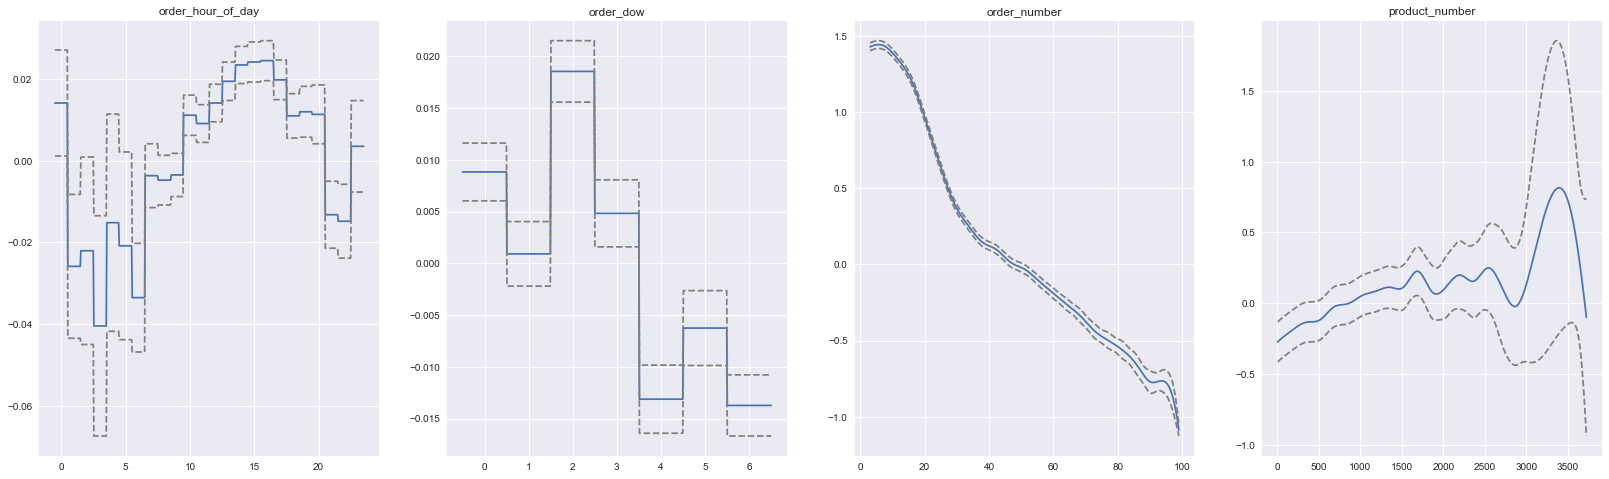

In [80]:
XX = generate_X_grid(gam2)
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, 4)
titles = X.columns
for i, ax in enumerate(axs):
    pdep, confi = gam2.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

### Gradient Boosting regression

In [15]:
X_prior = build_feature(transform_prior)
X_train = build_feature(transform_train)
y_prior = transform_prior.days_since_prior_order
y_train = transform_train.days_since_prior_order

In [28]:
gbrt = GradientBoostingRegressor(n_estimators=10, learning_rate = 0.1, max_depth = 5)
gbrt.fit(X_prior, y_prior)
y_pred = gbrt.predict(X_train)

In [22]:
sm.tools.eval_measures.rmse(y_train, y_pred)

9.869582623135328

In [18]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [3,4,5,6,7]}
est = GradientBoostingRegressor(n_estimators = 10)
n_jobs = 4
gs_cv = GridSearchCV(est, param_grid, n_jobs = n_jobs ).fit(X_prior, y_prior)
gs_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 7}

In [34]:
transform_copy['pred_gb'] = y_pred

In [102]:
gb_rmse1 = subset_rmse(0, 20, 'pred_gb', 'order number < 20')
gb_rmse1

10.380034662373173

In [110]:
gb_rmse1 = subset_rmse(20, 40, 'pred_gb', '20 < order number <= 40')
gb_rmse1

8.980089961036517

In [114]:
gb_rmse2 = subset_rmse(40, 60, 'pred_gb', '40 < order number <= 60 ')
gb_rmse2

6.578641123269928

In [115]:
gb_rmse3 = subset_rmse(60, 80, 'pred_gb', '60 < order number <= 80 ')
gb_rmse3

5.790136000912753

In [35]:
gb_rmse4 = subset_rmse(80, 100, 'pred_gb', '80 < order number < 100 ')
gb_rmse4

5.229066474330517

The rmse for gradient boosting is 9.869582623135328, smaller than poisson and poisson with GAM. However, 9.87 is not a good result. So I checked rmse for customers with different number of orders and assumed as number of order increase, the rmse should be smaller. The results followed my assumptions. The rmse for order number less than 20 is 10.38 very large and the rmse for order number greater than 80 is 5.22, much better. However, since in the data, 75% customers have order number less than 20, so the rmse for the whole data is 9.87. 